***Meat Quality Assessment based on Deep Learning***

Authors: O. Ulucan, D. Karakaya, M. Turkan
Department of Electrical and Electronics Engineering, Izmir University of Economics, Izmir, Turkey
Corresponding author: M. Turkan
Contact Information: mehmet.turkan@ieu.edu.tr


***General Introduction***

This dataset contains 2 classes, fresh and spoiled red meat samples collected from a supermarket in Izmir, Turkey
for a university-industry collaboration project at Izmir University of Economics, and this work
was published in ASYU 2019. 

If you use this dataset in your work, please consider to cite:
* O.Ulucan , D.Karakaya and M.Turkan.(2019) Meat quality assessment based on deep learning.
In Conf. Innovations Intell. Syst. Appli. (ASYU)

***Purpose of the work***

This dataset was collected in order to develop a meat quality assessment system which is based on deep learning. 
All of the experimental results which are explained in the paper, prove the usability of our dataset and our model can successfully distinguish between the classes with high accuracy.


***Resolution and the Number of the Images***

Images were collected via an IP camera and the resolution of the images are 1280 x 720. There are 1896 images in total, 948 per class. 

<a id="t1."></a>
# 1. Import data and python packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

import os
from IPython.display import clear_output

In [22]:
# train_directory = 'Dataset/Beef/Meat/train'
# test_directory  = 'Dataset/Beef/Meat/test'

In [24]:
# Set the desired sample size
sample_size = 1475

# Set the desired width and height for resizing images
width = 224
height = 224

In [26]:

files = ['Fresh', 'Melted']
train_directory = 'Dataset/Beef/Meat/train/{}/'
data = {}

for f in files:
    data[f] = []

for col in files:
    directory = train_directory.format(col)
    counter = 0
    for i in os.listdir(directory):
        if i.endswith('.jpg'):
            data[col].append(os.path.join(directory, i))
            counter += 1
            if counter == sample_size:
                break

start = time.time()
image_train_data = []
image_train_target = []

for title in files:
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     
        image_train_data.append(cv2.resize(img, (width, height)))
        image_train_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class", title)

calculate_time = time.time() - start    
print("Calculate Time", round(calculate_time, 5))

# Check the number of images collected for each class
for key, value in data.items():
    print(f"Number of images for class {key}: {len(value)}")

# Create a DataFrame
image_train_data = np.array(image_train_data)
size_train = image_train_data.shape[0]
image_train_data.shape

Compiled Class Melted
Calculate Time 7.89395
Number of images for class Fresh: 1475
Number of images for class Melted: 1475


(2950, 224, 224, 3)

In [27]:
pd.DataFrame(data).head()

Fresh  \
0     Dataset/Beef/Meat/train/Fresh/Fresh (1).jpg   
1    Dataset/Beef/Meat/train/Fresh/Fresh (10).jpg   
2   Dataset/Beef/Meat/train/Fresh/Fresh (100).jpg   
3  Dataset/Beef/Meat/train/Fresh/Fresh (1000).jpg   
4  Dataset/Beef/Meat/train/Fresh/Fresh (1001).jpg   

                                             Melted  
0     Dataset/Beef/Meat/train/Melted/Melted (1).jpg  
1    Dataset/Beef/Meat/train/Melted/Melted (10).jpg  
2   Dataset/Beef/Meat/train/Melted/Melted (100).jpg  
3  Dataset/Beef/Meat/train/Melted/Melted (1004).jpg  
4  Dataset/Beef/Meat/train/Melted/Melted (1005).jpg

In [28]:
# import os
# 
# files = ['Fresh', 'Melted']
# test_directory = 'Dataset/Beef/Meat/test/{}/'
# data_test = {}
# 
# for f in files:
#     data_test[f] = []
# 
# for col in files:
#     directory = test_directory.format(col)
#     for i in os.listdir(directory):
#         if i.endswith('.jpg'):
#             data_test[col].append(os.path.join(directory, i))
# 
# start = time.time()
# image_test_data = []
# image_test_target = []
# 
# for title in files:
#     directory = test_directory.format(title)
#     counter = 0
#     for i in data_test[title]:
#         img = cv2.imread(i)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#         image_test_data.append(cv2.resize(img, (width, height)))
#         image_test_target.append(title)
#         counter += 1
#         if counter == sample_size:
#             break
#     clear_output(wait=True)
#     print("Compiled Class",title)
# calculate_time = time.time() - start    
# print("Calculate Time", round(calculate_time, 5))
# 
# image_test_data = np.array(image_test_data)
# size_test = image_test_data.shape[0]
# image_test_data.shape


In [30]:
# pd.DataFrame(data).head()

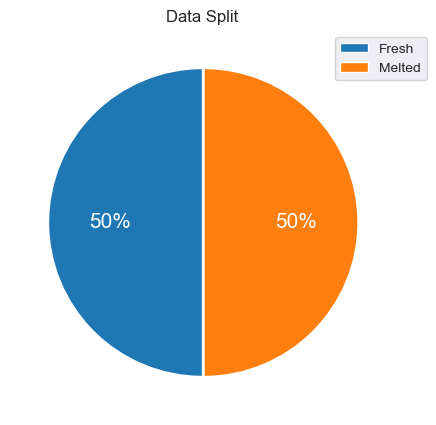

In [31]:
sizes = [len(data['Fresh']), len(data['Melted'])]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

<a id="t2."></a>
# 2. Data visualization

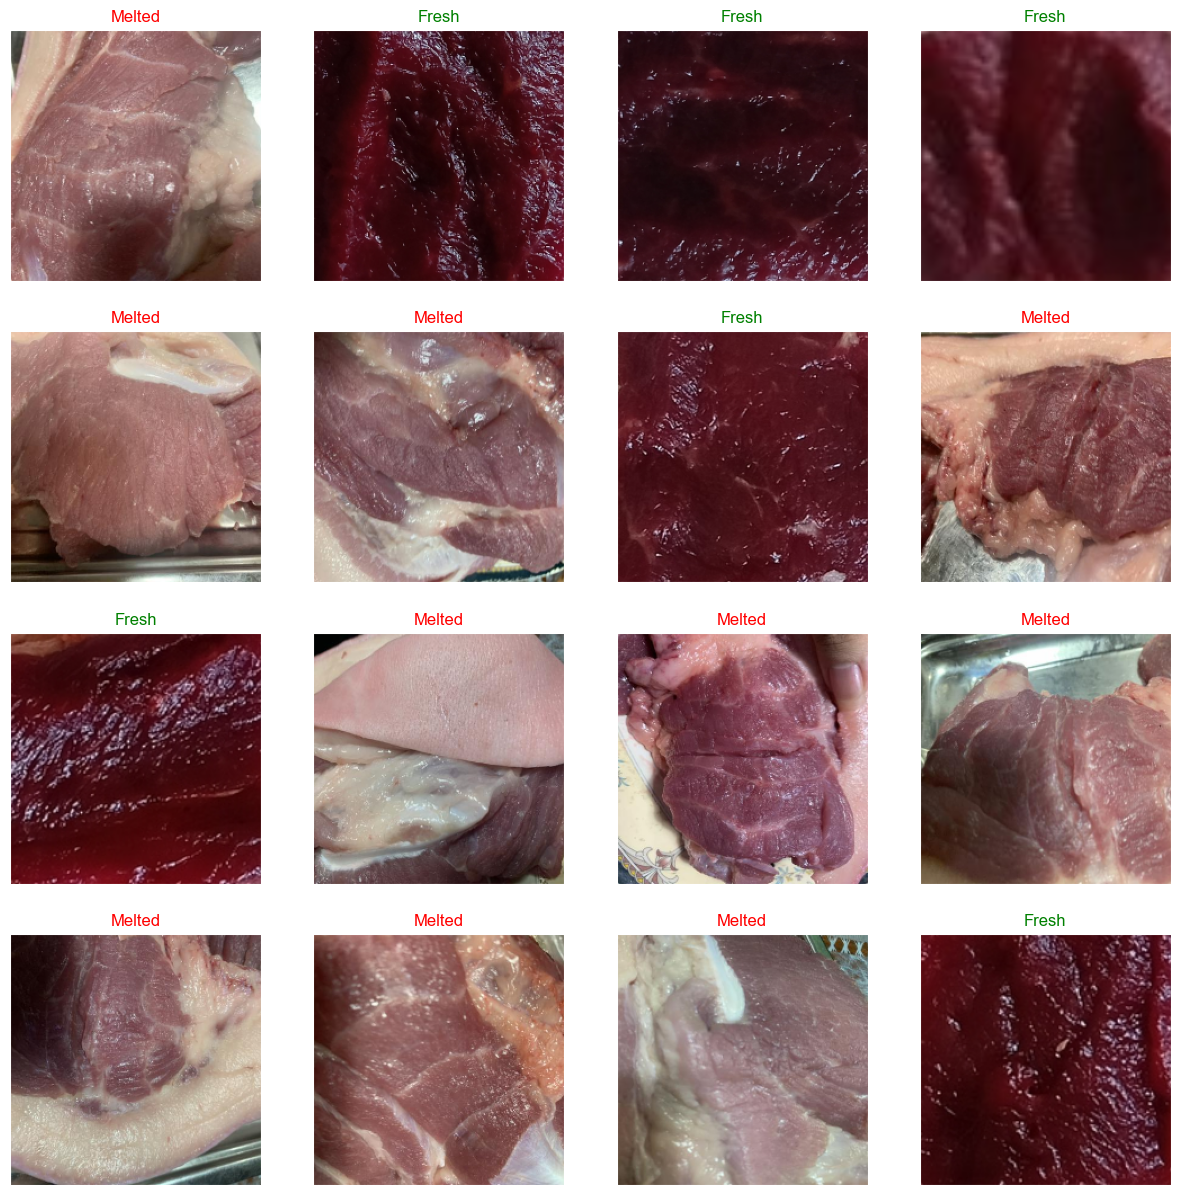

In [32]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size_train))
    plt.subplot(4,4,i)
    plt.imshow(image_train_data[fig])
    if image_train_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_train_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

<a id="t3."></a>
# 3. Classification (CNN)

In [33]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

In [34]:
labels = LabelEncoder()
labels.fit(image_train_target)

LabelEncoder()

In [35]:
X = image_train_data / 255.0
y = labels.transform(image_train_target)
# tX = image_test_data / 255.0
# ty = labels.transform(image_test_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.15, random_state=123)

In [113]:
# train_images, train_labels = X , y
# test_images , test_labels = tX, ty

In [44]:
# Membuat model Sequential
model = models.Sequential()
# model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(width,height,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten(input_shape=(width,height,3)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2))

In [45]:
# callback if accuracy and val_accucary above or reached 99% training stop

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
            print("\nReached or Exceed 99.0% accuracy so cancelling training!")
            self.model.stop_training = True
            

In [46]:
# from sklearn.preprocessing import LabelEncoder
# 
# # Assuming you've already defined train_images, test_images, train_labels, and test_labels
# 
# # Convert train_labels and test_labels to integers using LabelEncoder
# label_encoder = LabelEncoder()
# train_labels_encoded = label_encoder.fit_transform(train_labels)
# test_labels_encoded = label_encoder.transform(test_labels)
# 
# # Compile the model
# model.compile(optimizer='RMSprop',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# 
# #declare myCallback() class
# callback = myCallback()
# 
# # Fit the model
# history = model.fit(train_images, train_labels_encoded, epochs=30, 
#                     validation_data=(test_images, test_labels_encoded),
#                     batch_size=32,
#                     verbose=1, callbacks=callback)


In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
79/79 [==============================] - 6s 68ms/step - loss: 2.0629 - accuracy: 0.9222 - val_loss: 7.8754e-04 - val_accuracy: 1.0000
Epoch 2/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0160 - val_accuracy: 0.9977
Epoch 3/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0252 - accuracy: 0.9932 - val_loss: 4.3473e-04 - val_accuracy: 1.0000
Epoch 4/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0034 - val_accuracy: 0.9977
Epoch 5/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 0.0577 - val_accuracy: 0.9752
Epoch 6/10
79/79 [==============================] - 3s 43ms/step - loss: 0.0113 - accuracy: 0.9948 - val_loss: 1.6139e-04 - val_accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0088 - accuracy: 0.9960 - val_loss: 1.0204e-05 - val_accuracy: 1.00

14/14 - 0s - loss: 0.0496 - accuracy: 0.9774 - 147ms/epoch - 11ms/step


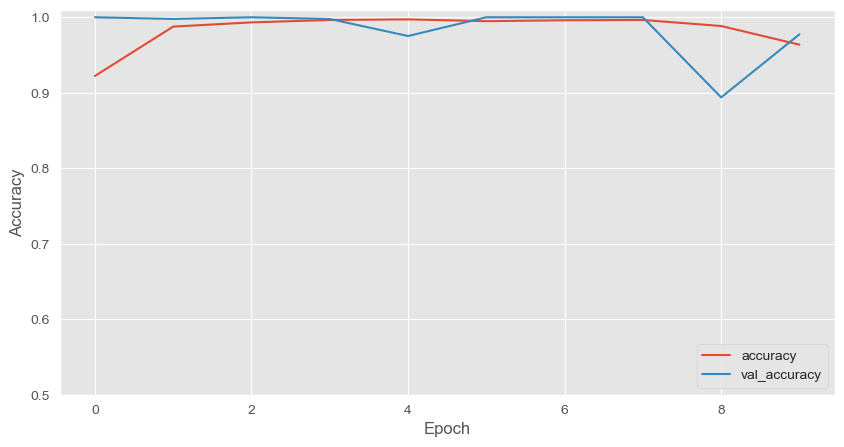

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [49]:
result=model.evaluate(test_images, test_labels)

14/14 [==============================] - 0s 7ms/step - loss: 0.0496 - accuracy: 0.9774


In [50]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.049576736986637115
accuracy : 0.9774266481399536


<a id="t4."></a>
# 4. Prediction

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

14/14 [==============================] - 0s 6ms/step


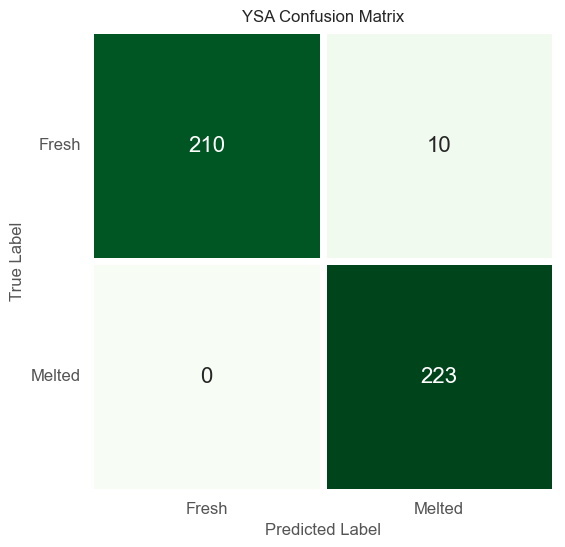

In [52]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Fresh","Melted"], index= ["Fresh","Melted"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [53]:
from sklearn.metrics import classification_report

# Prediksi kelas untuk data uji
y_pred_class = toClass(y_pred)

# Buat classification report
report = classification_report(test_labels, y_pred_class, target_names=files)

# Tampilkan classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       Fresh       1.00      0.95      0.98       220
      Melted       0.96      1.00      0.98       223

    accuracy                           0.98       443
   macro avg       0.98      0.98      0.98       443
weighted avg       0.98      0.98      0.98       443


In [54]:
def Prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 22ms/step


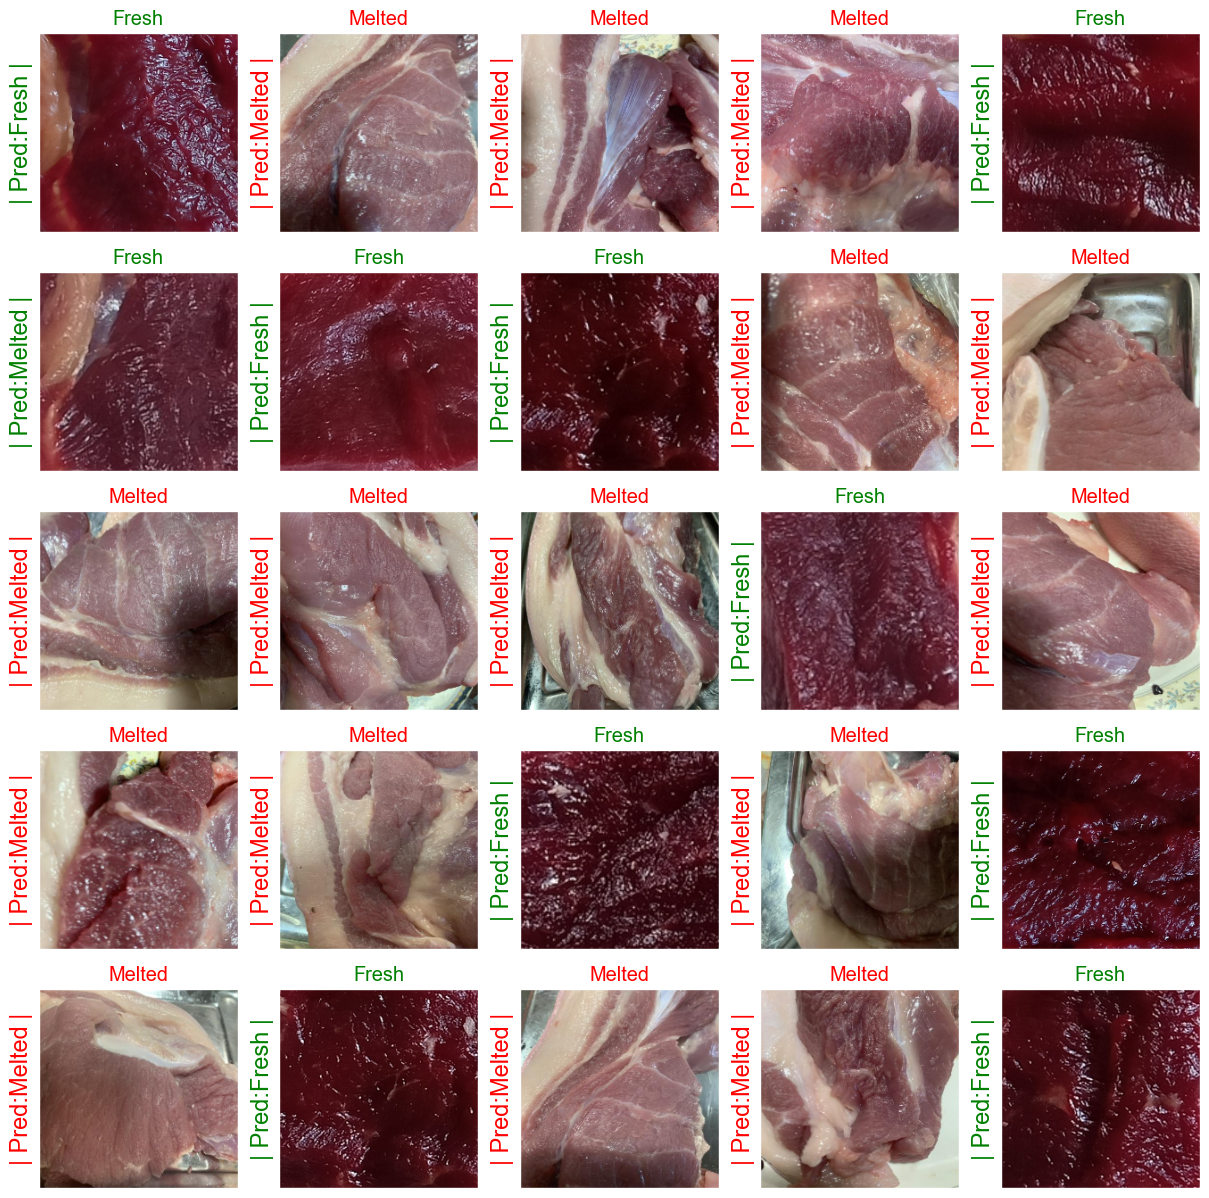

In [66]:
plt.figure(figsize=(15,15))
for i in range(1,26):
    fig = np.random.choice(np.arange(size_train))
    plt.subplot(5,5,i)
    plt.imshow(image_train_data[fig])
    if image_train_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_train_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_train_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()